In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data=pd.read_csv("marks.csv")

In [7]:
data.head(5)

,Marks1,Marks2,Admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [8]:
data['Admission'].value_counts()

1    60
0    40
Name: Admission, dtype: int64

In [ ]:
# not class of imbalance

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Marks1     100 non-null    float64
 1   Marks2     100 non-null    float64
 2   Admission  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [9]:
data['Marks1'].isnull().sum()

0

In [10]:
data['Marks2'].isnull().sum()

0

In [21]:
y=pd.DataFrame(data.iloc[:,-1],columns=['predicted_value'])
#y=data.iloc[:,-1]
y

,Admission
0,0
1,0
2,0
3,1
4,1
...,...
95,1
96,1
97,1
98,1


In [17]:
x=data.iloc[:,:-1]
x

,Marks1,Marks2
0,34.623660,78.024693
1,30.286711,43.894998
2,35.847409,72.902198
3,60.182599,86.308552
4,79.032736,75.344376
...,...,...
95,83.489163,48.380286
96,42.261701,87.103851
97,99.315009,68.775409
98,55.340018,64.931938


In [28]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [33]:
x_train.shape

(75, 2)

In [34]:
x_test.shape

(25, 2)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
M=LogisticRegression()

In [38]:
M.fit(x_train,y_train)

C:\Users\Lenovo\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
y_pred=M.predict(x_test)

In [40]:
y_pred

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1], dtype=int64)

In [44]:
type(y_test)


pandas.core.frame.DataFrame

In [56]:
compare=pd.DataFrame()
compare['actual']=y_test['Admission'].tolist()
compare['predicted']=pd.Series(y_pred)
compare

,actual,predicted
0,1,1
1,1,1
2,1,0
3,1,1
4,1,1
5,0,0
6,0,1
7,1,1
8,1,1
9,0,0


# Confusion Matrix

In [ ]:
#   https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

In [57]:
from  sklearn import metrics

In [58]:
c1=metrics.confusion_matrix(y_test,y_pred)

In [60]:
print(c1)

[[ 9  2]
 [ 1 13]]


In [62]:
metrics.accuracy_score(y_test,y_pred)

0.88

In [63]:
metrics.precision_score(y_test,y_pred)

0.8666666666666667

In [64]:
metrics.recall_score(y_test,y_pred)

0.9285714285714286

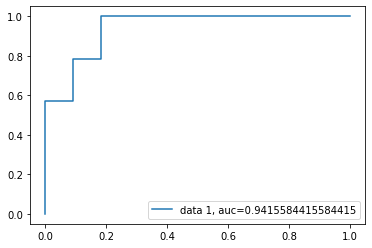

In [66]:

y_pred_proba = M.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
